## Problem Statement

In [34]:
## importing the necessary libraries

import pandas as pd
import numpy as np
import math 

In [35]:
df_train = pd.read_csv("Bank Client Deposit Data set Classification.csv")

In [36]:
df_train.head(10).T

0           1             2            3        4  \
age                58          44            33           47       33   
job        management  technician  entrepreneur  blue-collar  unknown   
marital       married      single       married      married   single   
education    tertiary   secondary     secondary      unknown  unknown   
default            no          no            no           no       no   
balance          2143          29             2         1506        1   
housing           yes         yes           yes          yes       no   
loan               no          no           yes           no       no   
contact       unknown     unknown       unknown      unknown  unknown   
day                 5           5             5            5        5   
month             may         may           may          may      may   
duration          261         151            76           92      198   
campaign            1           1             1            1        1   
pdays              -1          -1            -1           -1       -1   
previous            0           0             0            0        0   
poutcome      unknown     unknown       unknown      unknown  unknown   
y                  no          no            no           no       no   

                    5           6             7        8           9  
age                35          28            42       58          43  
job        management  management  entrepreneur  retired  technician  
marital       married      single      divorced  married      single  
education    tertiary    tertiary      tertiary  primary   secondary  
default            no          no           yes       no          no  
balance           231         447             2      121         593  
housing           yes         yes           yes      yes         yes  
loan               no         yes            no       no          no  
contact       unknown     unknown       unknown  unknown     unknown  
day                 5           5             5        5           5  
month             may         may           may      may         may  
duration          139         217           380       50          55  
campaign            1           1             1        1           1  
pdays              -1          -1            -1       -1          -1  
previous            0           0             0        0           0  
poutcome      unknown     unknown       unknown  unknown     unknown  
y                  no          no            no       no          no

In [37]:
df_train.shape

(45211, 17)

In [38]:
df_train.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [39]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [40]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
for i in df_train.columns:
    print("<-------------------------------------------------->")
    print(i)
    print(df_train[i].value_counts())
    print("<-------------------------------------------------->")

<-------------------------------------------------->
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
<-------------------------------------------------->
<-------------------------------------------------->
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857


## Visualizations

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

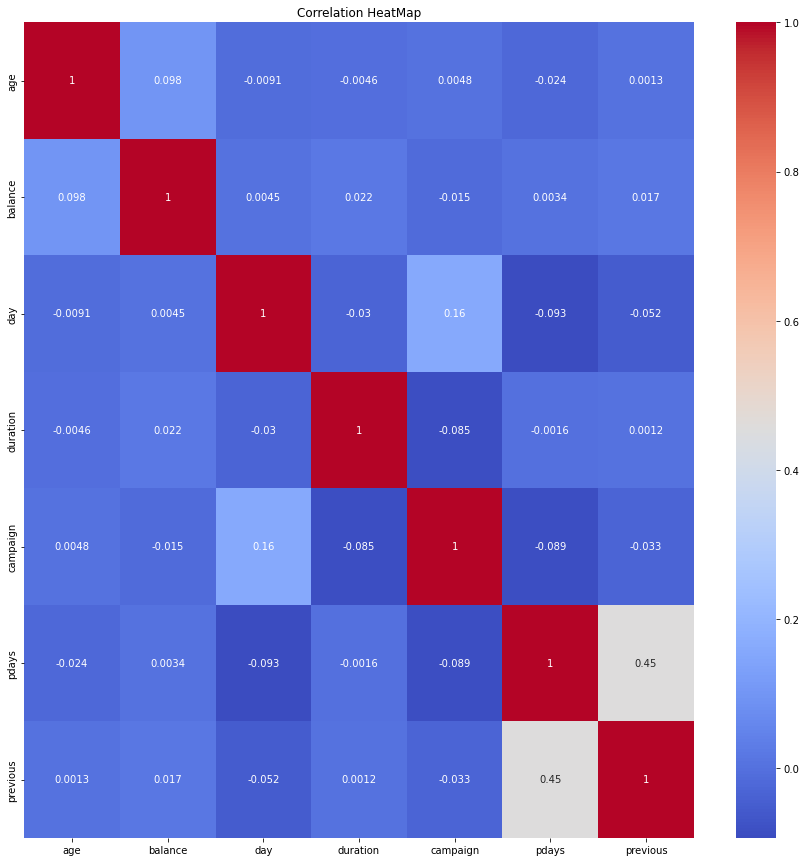

In [44]:
plt.subplots(figsize=(15,15))

plt.title("Correlation HeatMap")
sns.heatmap(df_train.corr(), annot = True, cmap = "coolwarm")
plt.show()

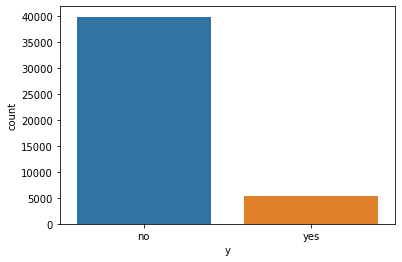

In [45]:
sns.countplot(x = "y", data = df_train)
plt.show()

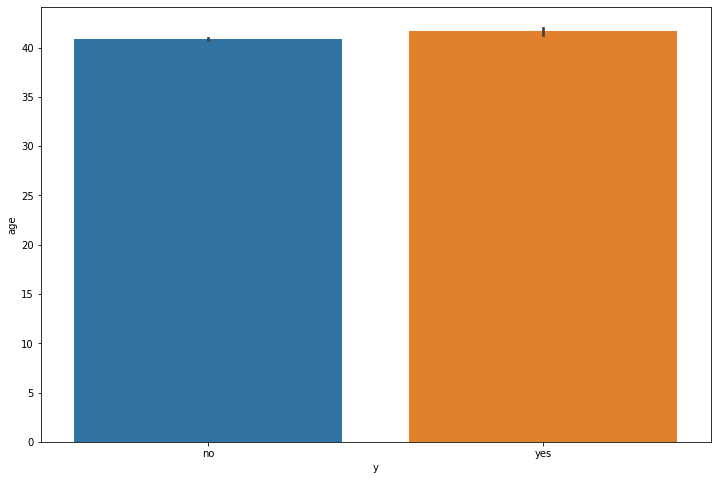

In [46]:
## Barplot

plt.figure(figsize = (12,8))
sns.barplot(x = 'y', y = 'age', data = df_train)
plt.show()

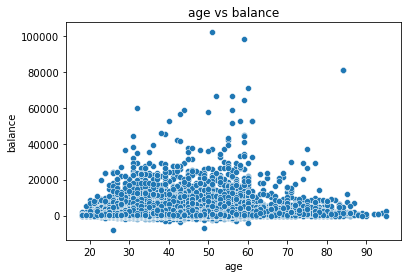

In [47]:
## scatter plot

sns.scatterplot(x = "age", y = "balance", data = df_train, palette = ['blue', 'red'])
plt.title('age vs balance')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

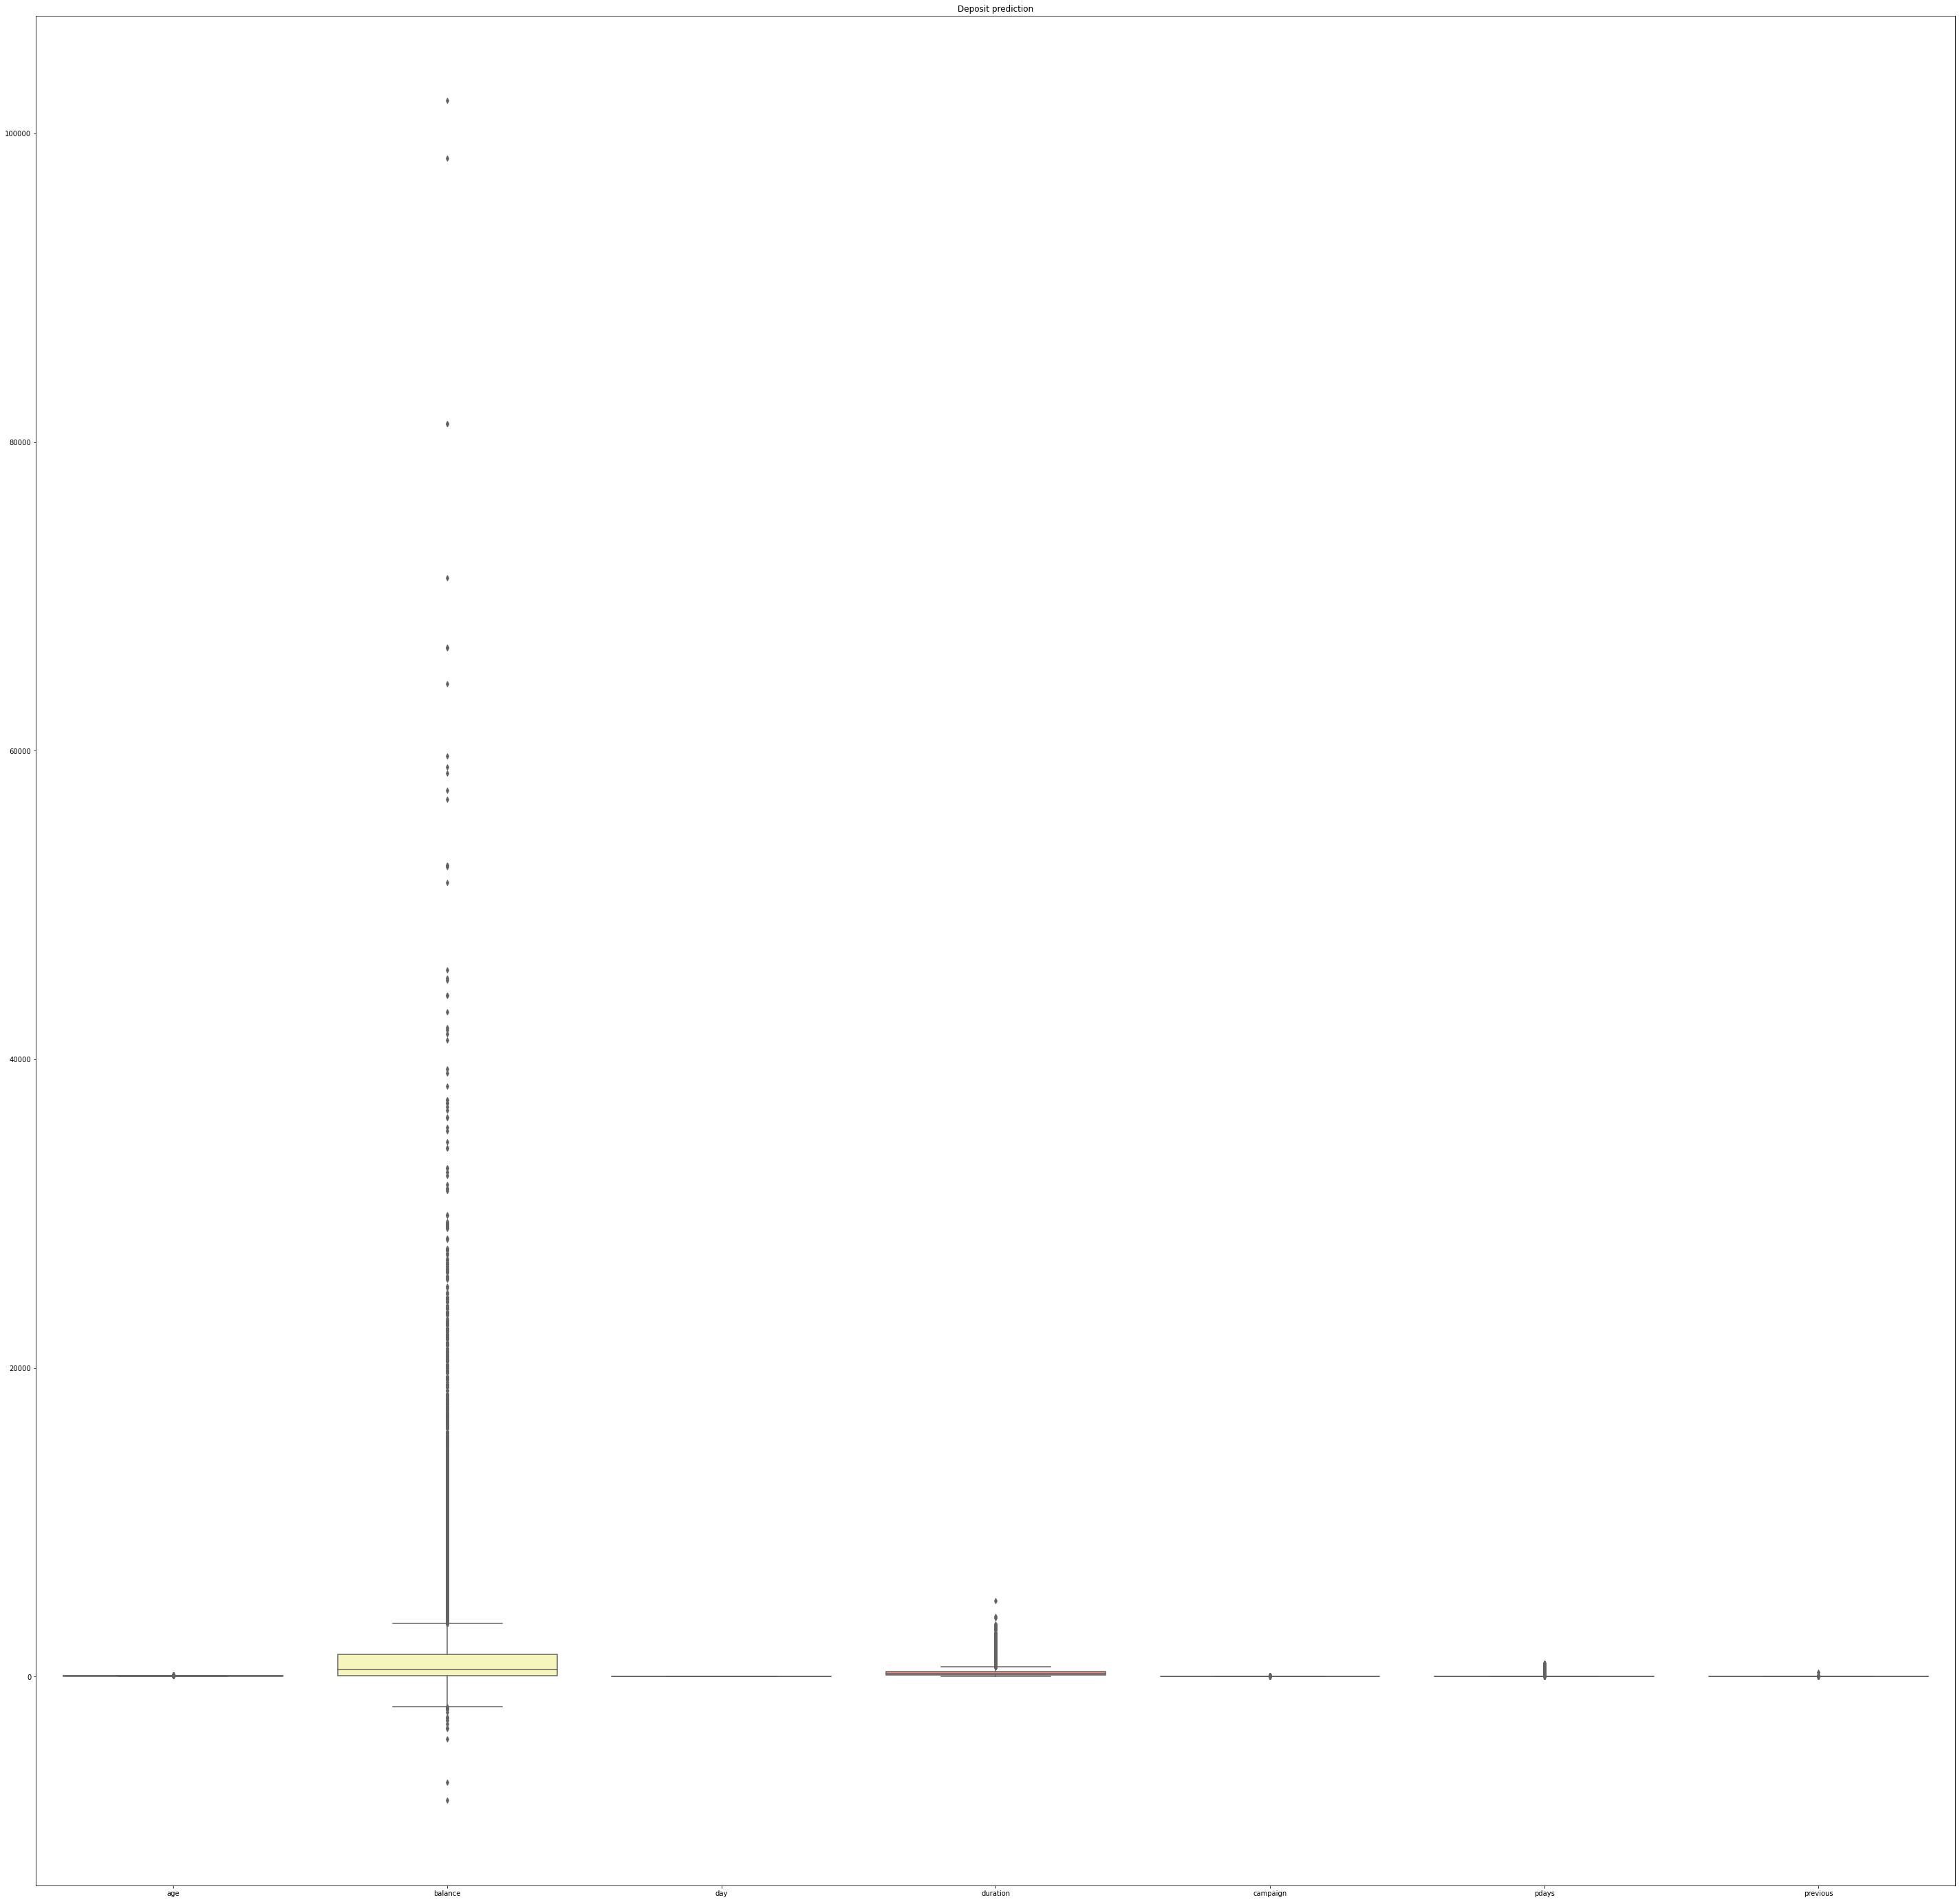

In [48]:
## Box plot

# Create the box plot
fig, ax = plt.subplots(figsize=(50,50))
sns.boxplot(data=df_train, palette="Set3")
plt.title("Deposit prediction")
plt.show()

In [49]:
column_stats = df_train['balance'].describe()
print(column_stats)

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


In [50]:
column_stats = df_train['duration'].describe()
print(column_stats)

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


In [51]:
column_stats = df_train['pdays'].describe()
print(column_stats)

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [52]:
df_train['balance'] = np.where(df_train['balance'] >2000 , np.log(df_train['balance']), df_train['balance'])

C:\Users\Chaitu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Chaitu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
df_train['duration'] = np.where(df_train['duration'] >1000 , np.log(df_train['duration']), df_train['duration'])

In [56]:
df_train['pdays'] = np.where(df_train['pdays'] >52 , np.log(df_train['pdays']), df_train['pdays'])

C:\Users\Chaitu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
column_stats = df_train['balance'].describe()
print(column_stats)

count    45211.000000
mean       352.746381
std        536.258243
min      -8019.000000
25%          8.031060
50%        146.000000
75%        594.000000
max       2000.000000
Name: balance, dtype: float64


In [57]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [58]:
for i in cat_cols:
    df_train[i]=df_train[i].astype('category').cat.codes
 

In [60]:
df_train.dtypes

age            int64
job             int8
marital         int8
education       int8
default         int8
balance      float64
housing         int8
loan            int8
contact         int8
day            int64
month           int8
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome        int8
y               int8
dtype: object

In [62]:
# Split the dataset into training and testing sets
# Use 70% of the data for training and 30% for testing
train_data = df_train.sample(frac=0.7, random_state=42)
test_data = df_train.drop(train_data.index)

# Separate the features and target variables
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31648, 16)
(31648,)
(13563, 16)
(13563,)


In [64]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
#y_train=y_train[:,np.newaxis]

## Model Building

In [65]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, variance, and prior probability for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [66]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [67]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification accuracy", accuracy(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification accuracy", accuracy(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_3644\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes train classification accuracy 0.829657482305359
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification accuracy 0.8373516183735162


In [68]:
## precision


def precision(y_train,ypred):
    true_positives = 0
    false_positives = 0
    for i in range(len(y_train)):
        if ypred[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) 

In [69]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification precision", precision(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification precision", precision(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_3644\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes train classification precision 0.34789702683103696
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification precision 0.36049601417183347


In [70]:
## recall

def recall(y_train,ypred):
    true_positives = 0
    false_negatives = 0
    for i in range(len(y_train)):
        if y_train[i] == 1:
            if y_train[i] == ypred[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_negatives) 

In [71]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
ypred=nb.predict(X_train)
print("Naive Bayes train classification recall", recall(y_train,ypred))
print("~"*100)
print("Naive Bayes test classification recall", recall(y_test, predictions))

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_3644\2853148615.py:28: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Naive Bayes train classification recall 0.516832749798007
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Naive Bayes test classification recall 0.516497461928934
